# DS2_C9_S4_Challenge

In [1]:
# Load libraries
import pandas as pd
import numpy as np 
from numpy.random import default_rng
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Task 1 : Data Exploration and Visualization

In [2]:
df_hr  = pd.read_csv("D:\Data Science\Course 9\DS2_C5_S4_HR_Data_Challenge.csv")
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<AxesSubplot:xlabel='salary'>

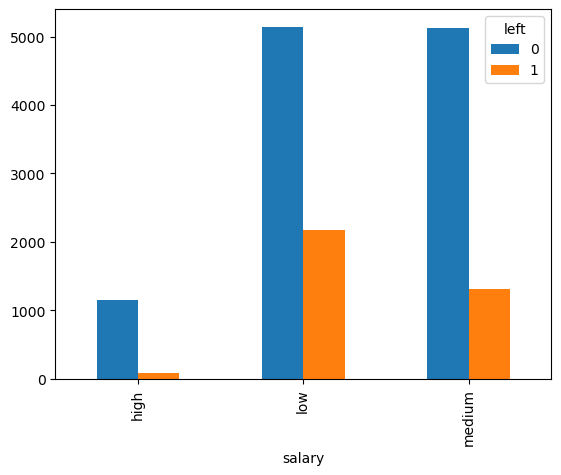

In [3]:
pd.crosstab(df_hr['salary'],df_hr['left']).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

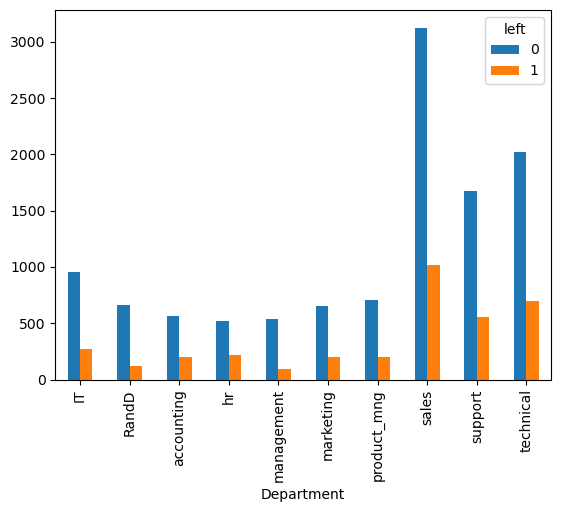

In [4]:
pd.crosstab(df_hr['Department'],df_hr['left']).plot(kind='bar')

# Task 2 : Data Processing 

In [5]:
df_hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
column_correlation = df_hr.corr().T
column_correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [7]:
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

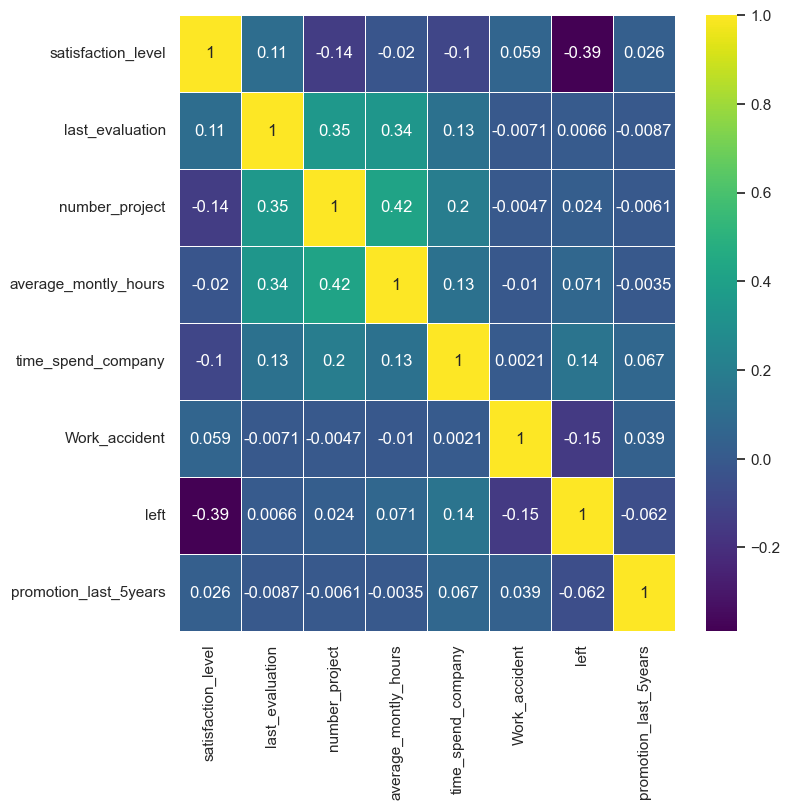

In [8]:
#plt.figure(figure= (10,10))
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(column_correlation,annot=True,linewidths=.5, ax=ax, cmap = "viridis")

plt.show()

In [9]:
#Encoding purpose variable to numeric variable
purpose_encoder = preprocessing.LabelEncoder()

# Encoding of the salary and department
purpose_encoder.fit(df_hr['Department'])
print(purpose_encoder.classes_)
df_hr['Department'] = purpose_encoder.transform(df_hr['Department'])
df_hr.head()

['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low


In [10]:
# Encoding of the salary and department
purpose_encoder.fit(df_hr['salary'])
print(purpose_encoder.classes_)
df_hr['salary'] = purpose_encoder.transform(df_hr['salary'])
df_hr.head()

['high' 'low' 'medium']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [11]:
#Creating test and training datasets
hr_train, hr_test = train_test_split(df_hr,train_size = 0.8)
print('Size of training dataset: ', hr_train.shape)
print('Size of test dataset: ', hr_test.shape)

Size of training dataset:  (11999, 10)
Size of test dataset:  (3000, 10)


In [12]:
X_train = hr_train.drop(columns='left', axis =1)
Y_train = hr_train['left']
X_test = hr_test.drop(columns='left', axis =1)
Y_test = hr_test['left']
X_train.shape, Y_train.shape, X_test.shape

((11999, 9), (11999,), (3000, 9))

# Task 3 : Modeling - Naive Bayes 

In [13]:
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 


In [14]:
# Fitting Naive Bayes to the Training set  
classifier=GaussianNB()
classifier.fit(X_train,Y_train)
ypred1=classifier.predict(X_test)

In [15]:
# Predicting the Test set results 
Y_pred = classifier.predict(X_test) 

In [16]:
cm = confusion_matrix(Y_test, Y_pred) 
cm

array([[1910,  395],
       [ 182,  513]], dtype=int64)

In [17]:
print("Accuracy of model in training data : ",round(classifier.score(X_train,Y_train)*100,2),"%")
print("Accuracy of model in test data : ",accuracy_score(Y_pred,Y_test)*100,"%")

Accuracy of model in training data :  79.61 %
Accuracy of model in test data :  80.76666666666667 %


# Task 4 : Modeling - Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

classifier2 = DecisionTreeClassifier(max_depth=3)
clf = classifier2.fit(X_train,Y_train)
ypred2 = clf.predict(X_test)

In [19]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8076666666666666


In [20]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[1910,  395],
       [ 182,  513]], dtype=int64)

In [21]:
# Evaluate other metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred, average='weighted'))
print('f1-score:', f1_score(Y_test, Y_pred, average='weighted'))
print('precision:', precision_score(Y_test, Y_pred))

accuracy: 0.8076666666666666
recall: 0.8076666666666666
f1-score: 0.815786377817765
precision: 0.5649779735682819


In [22]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score,roc_curve

In [23]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

In [26]:
# predict probabilities
lr_probs1 = classifier.predict_proba(X_test)
lr_probs2=classifier2.predict_proba(X_test)
lr_probs1 = lr_probs1[:,1]
lr_probs2=lr_probs2[:,1]

# Task 5 : Evaluation - Confusion matrix and ROC - AUC

No Skill: ROC AUC=0.500
Naive bayes : ROC AUC=0.860
Decision : ROC AUC=0.966


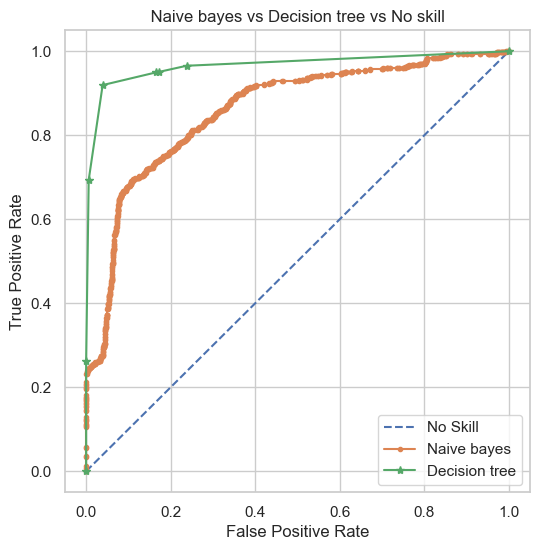

In [27]:

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc1 = roc_auc_score(Y_test, lr_probs1)
lr_auc2 = roc_auc_score(Y_test, lr_probs2)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive bayes : ROC AUC=%.3f' % (lr_auc1))
print('Decision : ROC AUC=%.3f' % (lr_auc2))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr1, lr_tpr1, _1 = roc_curve(Y_test, lr_probs1)
lr_fpr2, lr_tpr2, _2 = roc_curve(Y_test, lr_probs2)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Naive bayes')
plt.plot(lr_fpr2, lr_tpr2, marker='*', label='Decision tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(" Naive bayes vs Decision tree vs No skill ")
plt.gcf().set_size_inches(6, 6)
plt.legend()
plt.show()

# Conclusion:
Decision tree has better performance model as we can compare Naive bayes : ROC AUC=0.860
Decision : ROC AUC=0.966 .
